## Greenland Surface Temperature

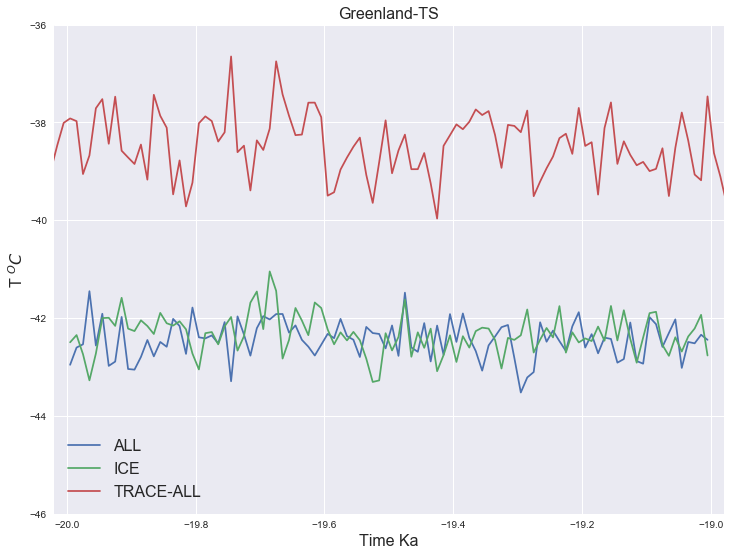

In [8]:
%matplotlib inline
from findVar import *
import xarray as xr
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mpld3

#%%
dir = ['/Volumes/Chengfei_Data_Center/iTrace/atm/ANN/',
       '/Volumes/Chengfei_Data_Center/iTrace/atm/ANN/',
       '/Volumes/Chengfei_Data_Center/Trace/atm/ANN/']

prefix = ['b.e13.Bi1850C5.f19_g16.20ka.itrace.ice_ghg_orb.01',
          'b.e13.Bi1850C5.f19_g16.20ka.itrace.03',
          'TRACE']

mpld3.enable_notebook()
fig, ax = plt.subplots(figsize=(12,9))
for d, p in zip(dir, prefix):
    fl = findVar('TS', dir=d, pref=p)
    ds = xr.open_mfdataset(fl)
    ds -= 273.15
    # green land airTemp
    ds.TS.where((ds.lat>72) & (ds.lat<73) & (ds.lon>321) & (ds.lon<323)).groupby('time').mean().plot()

ax.set_title('Greenland-TS', fontsize=16)
ax.set_ylabel('T $^OC$', fontsize=16)
ax.set_xlabel('Time Ka', fontsize=16)
# ax.legend(['ALL', 'ICE', 'TRACE-ALL'])
ax.legend(['ALL', 'ICE', 'TRACE-ALL'], fontsize=16)
ax.set_xlim([-20.02, -18.98])
ax.set_ylim([-46, -36]);

## AMOC


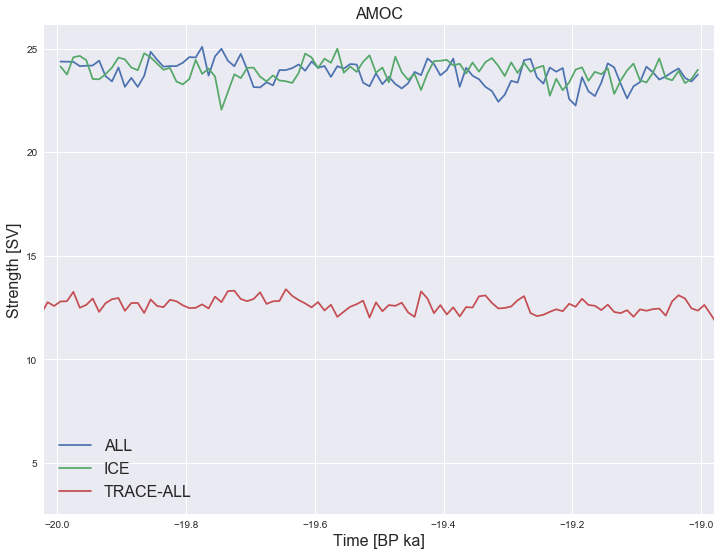

In [7]:
dir = ['/Volumes/Chengfei_Data_Center/iTrace/ocn/ANN/',
       '/Volumes/Chengfei_Data_Center/iTrace/ocn/ANN/',
      '/Volumes/Chengfei_Data_Center/Trace/ocn/ANN/']
prefix = ['b.e13.Bi1850C5.f19_g16.20ka.itrace.ice_ghg_orb.01',
          'b.e13.Bi1850C5.f19_g16.20ka.itrace.03',
         'TRACE']

mpld3.enable_notebook()
fig, ax = plt.subplots(figsize=(12,9))
for d, p in zip(dir, prefix):
    fl = findVar('MOC', dir=d, pref=p)
    ds = xr.open_mfdataset(fl)

    moc = ds.MOC[:, 1, 0, :, :]
    moc.values[np.abs(moc.values) < 1e-6] = np.nan
    # amoc area
    z_bound = moc.moc_z[(moc.moc_z > 2e4) & (moc.moc_z < 5e5)]
    lat_bound = moc.lat_aux_grid[
        (moc.lat_aux_grid > 10) & (moc.lat_aux_grid < 60)]
    amoc = moc.sel(moc_z=z_bound, lat_aux_grid=lat_bound).groupby('time').max()
    amoc.plot(ax=ax)

ax.set_title('AMOC', fontsize=16)
ax.set_ylabel('Strength [SV]', fontsize=16)
ax.set_xlabel('Time [BP ka]', fontsize=16)
ax.legend(['ALL', 'ICE', 'TRACE-ALL'], fontsize=16)
ax.set_xlim([-20.02, -18.98]);

## SST


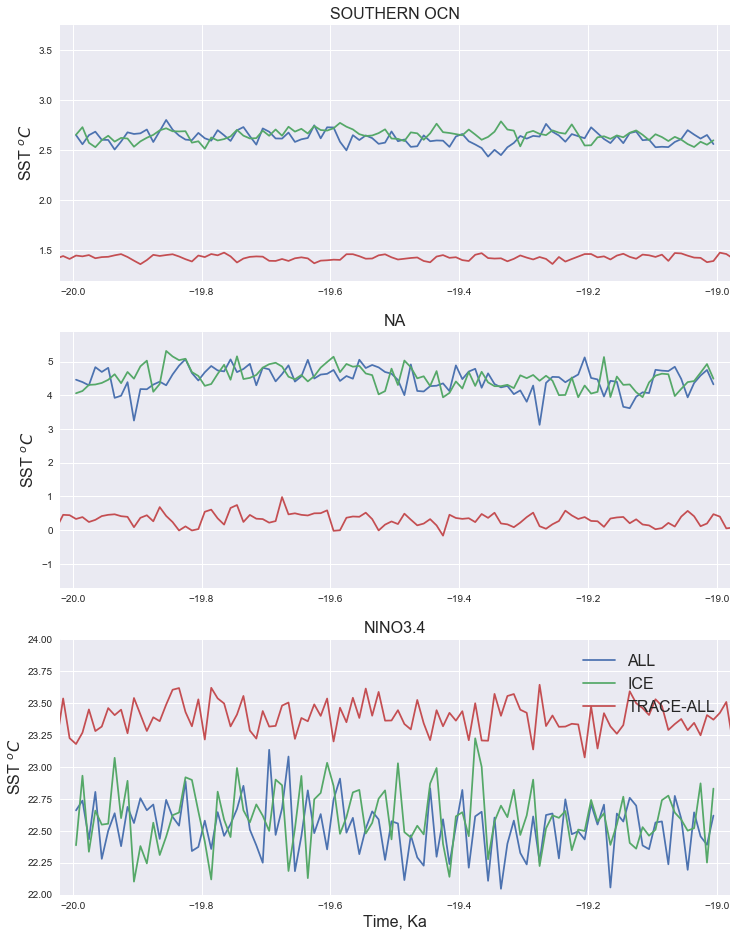

In [16]:
fileName = ['iTRACE.ALL.SST.nc', 'iTRACE.ICE.SST.nc', 'TRACE.ALL.SST.nc']
mflcfg1 = xr.open_dataarray('../Model_Configuration_data/REGION_MASK_gx1v6.nc')
mflcfg2 = xr.open_dataarray('../Model_Configuration_data/REGION_MASK_gx3v5.nc')
mlfcfg = [mflcfg1, mflcfg1, mflcfg2]

mpld3.enable_notebook()
fig, axis = plt.subplots(nrows=3, figsize=(12, 16))
for fn, p, ml in zip(fileName, prefix, mlfcfg):
    
    sst = xr.open_dataarray(fn)

    # southern ocean
    sst.where(ml == 1).groupby('time').mean().plot(ax=axis[0])

    # North Atlantic
    sst.where((sst.TLAT > 55) & (sst.TLAT < 60) & (sst.TLONG > 325) &
              (sst.TLONG < 330)).groupby('time').mean().plot(ax=axis[1])

    # Nino 3.4
    sst.where((sst.TLAT > -5) & (sst.TLAT < 5) & (sst.TLONG > 190) & 
              (sst.TLONG < 240)).groupby('time').mean().plot(ax=axis[2])


title = ['SOUTHERN OCN', 'NA', 'NINO3.4']
for ax, tl in zip(axis, title):
    ax.set_xlim([-20.02, -18.98])
    ax.set_title(tl, fontsize=16)
    ax.set_ylabel('SST $^oC$', fontsize=16)
    ax.set_xlabel('')

axis[2].set_xlabel('Time, Ka', fontsize=16)
axis[2].set_ylim([22.0, 24.0])
axis[2].legend(['ALL', 'ICE', 'TRACE-ALL'], fontsize=16);